<a href="https://colab.research.google.com/github/vicente-gonzalez-ruiz/medical_imaging/blob/main/notebooks/equalized_histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

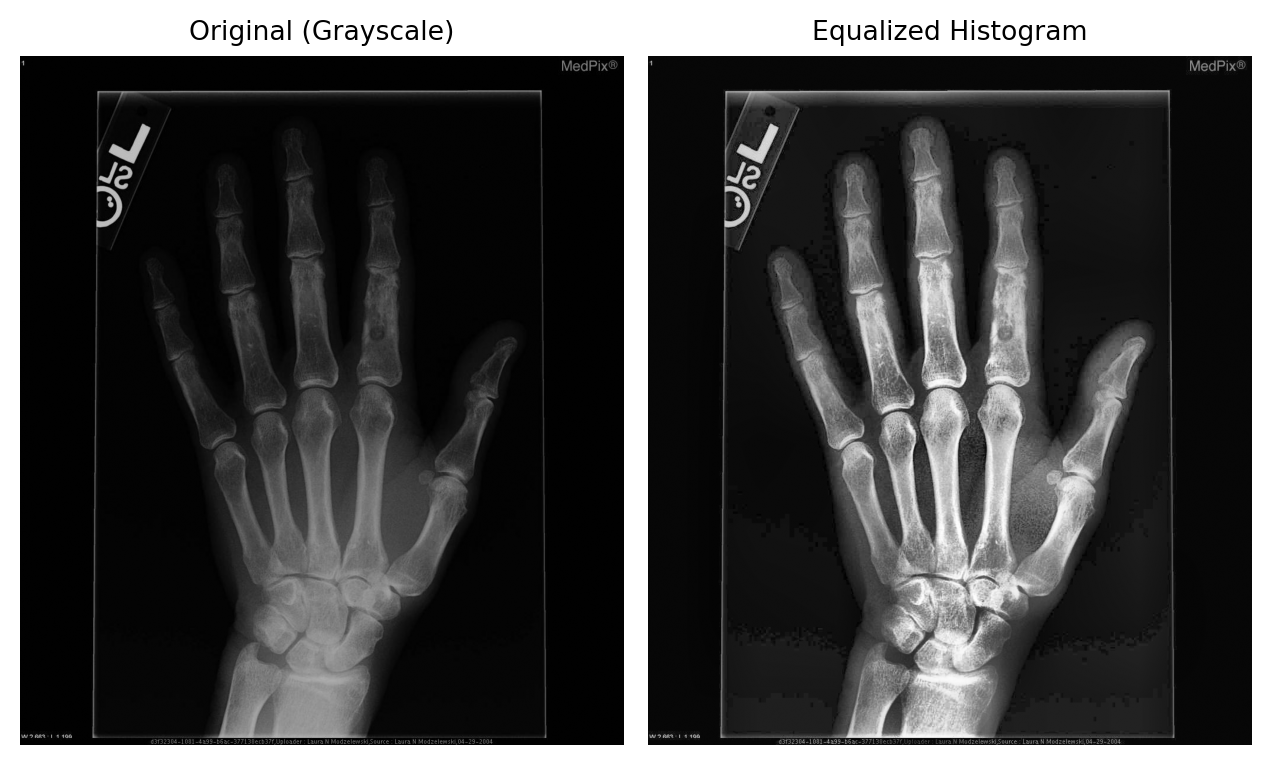

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure

import requests
from PIL import Image

matplotlib.rcParams['font.size'] = 8

# Load an example image
#img = data.moon()
# Get an image
# Using the same image URL from the original cell for consistency
image_url = "https://d2rfm59k9u0hrr.cloudfront.net/medpix/img/full/synpic19850.jpg"
response = requests.get(image_url, stream=True)
response.raise_for_status()

# Save the image to a file
image_path = "medical_image.jpg"
with open(image_path, 'wb') as out_file:
    out_file.write(response.content)

# Load the image
orig_img_rgb = Image.open(image_path)

# Convert the RGB image to grayscale
# There are several ways to convert to grayscale. One common method is using the luminosity formula:
# Gray = 0.2989*R + 0.5870*G + 0.1140*B
# PIL provides a direct convert method as well
orig_img = orig_img_rgb.convert('L')
img = np.array(orig_img)#[500: 1000, 500:1000]

# Adaptive Equalization
equalized_img = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display the original and equalized images

fig, axes = plt.subplots(1, 2, dpi=200)
axes[0].imshow(orig_img, cmap='gray') # Display the grayscale original
axes[0].set_title("Original (Grayscale)")
axes[0].axis('off')

axes[1].imshow(equalized_img, cmap='gray') # Display the equalized grayscale image
axes[1].set_title("Equalized Histogram")
axes[1].axis('off')

plt.tight_layout()
plt.savefig("equalized_histogram.png") # Save with a new name
plt.show()